In [9]:
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
data = pd.read_csv('data/Chandler.csv')  # Adjust path if necessary

In [4]:
# Filter out rows marked for exclusion
filtered_data = data[data['DROP'] == 0]

In [5]:
# Descriptive statistics for Age
age_stats = filtered_data['Age'].describe()

In [6]:
# Gender distribution
gender_counts = filtered_data['Gender'].value_counts(dropna=False)

In [7]:
# Academic year distribution
year_counts = filtered_data['Year'].value_counts(dropna=False)

In [8]:
# Display results
print("Descriptive Statistics for Age:")
print(age_stats)
print("\nGender Distribution:")
print(gender_counts)
print("\nAcademic Year Distribution:")
print(year_counts)


Descriptive Statistics for Age:
count    116.000000
mean      19.715517
std        1.140603
min       17.000000
25%       19.000000
50%       20.000000
75%       20.250000
max       22.000000
Name: Age, dtype: float64

Gender Distribution:
Gender
f    74
m    43
x     3
Name: count, dtype: int64

Academic Year Distribution:
Year
soph     41
frosh    41
jr       26
sr       11
f         1
Name: count, dtype: int64


In [11]:
# Number of participants and number of items
n_participants = filtered_data.shape[0]
n_items = 9  # known from the study

In [12]:
# Descriptive statistics for age
mean_age = round(filtered_data['Age'].mean(), 1)
std_age = round(filtered_data['Age'].std(), 1)
min_age = int(filtered_data['Age'].min())
max_age = int(filtered_data['Age'].max())

In [13]:
# Gender distribution and percentages
gender_counts = filtered_data['Gender'].value_counts()
gender_percents = round((gender_counts / n_participants) * 100, 1)

In [14]:
# Academic year distribution (only valid labels)
valid_years = ['frosh', 'soph', 'jr', 'sr']
year_counts = filtered_data['Year'].value_counts()
year_filtered = year_counts.reindex(valid_years).fillna(0).astype(int)

In [15]:
# Print the final summary
print(f"The dataset comprises {n_participants} participants retained after exclusion, "
      f"each providing estimates for {n_items} items.")
print(f"Average age: {mean_age} years (SD = {std_age}), range: {min_age}–{max_age}.")

print("\nGender distribution:")
for gender, count in gender_counts.items():
    percent = gender_percents[gender]
    label = {"f": "Female", "m": "Male", "x": "Unspecified"}.get(gender, gender)
    print(f"{label}: {count} ({percent}%)")

print("\nAcademic standing distribution:")
for year, count in year_filtered.items():
    label = {"frosh": "Freshmen", "soph": "Sophomores", "jr": "Juniors", "sr": "Seniors"}.get(year, year)
    print(f"{label}: {count}")


The dataset comprises 120 participants retained after exclusion, each providing estimates for 9 items.
Average age: 19.7 years (SD = 1.1), range: 17–22.

Gender distribution:
Female: 74 (61.7%)
Male: 43 (35.8%)
Unspecified: 3 (2.5%)

Academic standing distribution:
Freshmen: 41
Sophomores: 0
Juniors: 0
Seniors: 0


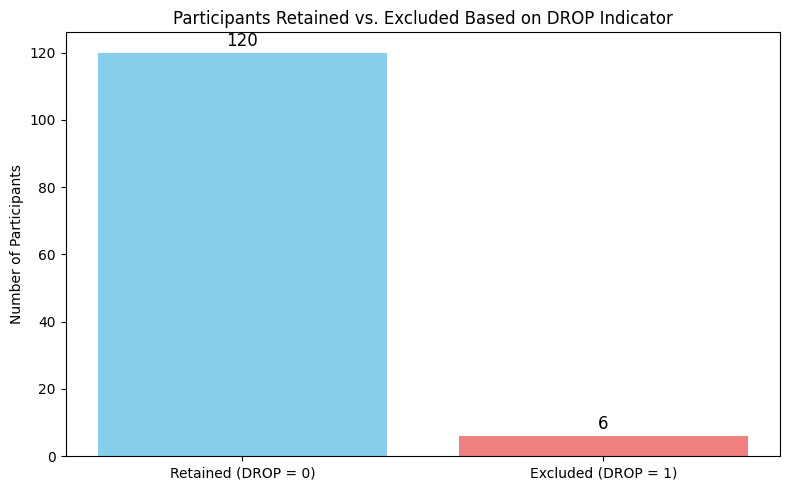

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/Chandler.csv')  # adjust the path if needed

# Count retained and excluded participants
drop_counts = data['DROP'].value_counts().sort_index()
labels = ['Retained (DROP = 0)', 'Excluded (DROP = 1)']
colors = ['skyblue', 'lightcoral']

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, drop_counts, color=colors)

# Add count labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, int(yval), ha='center', fontsize=12)

plt.ylabel("Number of Participants")
plt.title("Participants Retained vs. Excluded Based on DROP Indicator")
plt.tight_layout()
plt.show()
